# Multivariate Normal Distribution

The Multivariate Normal Distribution (MVN) is a probabilistic model with support on $\mathbb{R}^n$ with pdf

$$N(\mu,\Sigma) = \frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}\exp\left\{-\frac{1}{2}(x-\mu)'\Sigma^{-1}(x-\mu)\right\}$$

where $\mu\in\mathbb{R}^n$ and $\Sigma\in\mathbb{R}^{n\times n}$ is a symmetric positive definite matrix.

**Note:** Actually, the precise definition of a MVN does not require $\Sigma$ to be positive definite, it can be positive semi-definite, but in that case the pdf does not exist. Therefore, we will just study the case where it does, as most of the theoretical background in the field use such idea.

## Construction

Let $z_1,\dots,z_n$ be i.i.d. random variables with a standard normal distribution, $z=(z_1\cdots z_n)'$, $\mu\in\mathbb{R}^{n}$ and $\Sigma\in\mathbb{R}^{n\times n}$ be a symmetric positive definite matrix. Then, by independence

$$p_z(z) = \prod_{i=1}^n\frac{1}{\sqrt{2\pi}}e^{-z_i^2/2} = \frac{1}{(2\pi)^{n/2}}\exp\left\{-\frac{1}{2}z'z\right\}$$

Consider the bijective transformation $f:\mathbb{R}^n\rightarrow\mathbb{R}^n$ given by $f(z) = \Sigma^{1/2}z + \mu$ and define the new random variable $x=f(z)$. Note that $f^{-1}(x)=\Sigma^{-1/2}(x-\mu)$. Hence,

$$D[f^{-1}](x) = \Sigma^{-1/2}$$

Thus, by the change of variable theorem and the fact that $\Sigma^{-1/2} = \left(\Sigma^{-1/2}\right)' $ by simetry of $\Sigma$, see that

$$p_x(x) = p_y\left(f^{-1}(x)\right)\left|D\left[f^{-1}\right](x)\right| = \frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}\exp\left\{-\frac{1}{2}(x-\mu)'\Sigma^{-1}(x-\mu)\right\}$$

As a consequence of this construction, such distribution is named as the multivariate *Normal* distribution.

### Example

Se the following example for a 2D MVN by construction vs definition by comparing a random sample of $x_1=\Sigma^{1/2}z+\mu$ vs $x_2\sim N(\mu,\Sigma)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn

In [2]:
def get_mvn_sample(sample_size,mu,sigma):
    n = mu.shape[0]
    eigvals,eigvecs = np.linalg.eigh(sigma)
    sigma_sqrt = eigvecs @ np.diag(np.sqrt(eigvals)) @ eigvecs.T
    Z = norm(0,1).rvs(sample_size*n).reshape(sample_size,n)
    X = Z @ sigma_sqrt + mu.reshape(n)
    return X

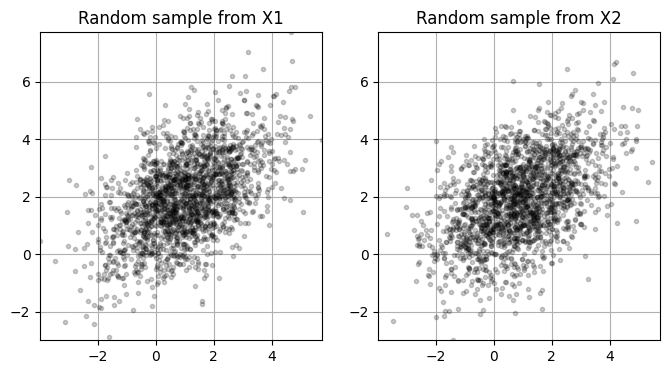

In [3]:
sample_size = 2000
mu = np.array([1,2])
sigma = np.array([[2,1],[1,2]])

X1 = get_mvn_sample(sample_size,mu, sigma)
X2 = mvn(mu,sigma).rvs(sample_size)

fig,ax = plt.subplots(1,2,figsize=(8,4))
for i,X in enumerate([X1,X2]):
    ax[i].scatter(X[:,0],X[:,1],color="black",marker=".",alpha=0.2)
    ax[i].set_title(f"Random sample from X{i+1}")
    ax[i].set_xlim(min([X1[:,0].min(),X2[:,0].min()]), max([X1[:,0].max(),X2[:,0].max()]))
    ax[i].set_ylim(min([X1[:,1].min(),X2[:,1].min()]), max([X1[:,1].max(),X2[:,1].max()]))
    ax[i].set_axisbelow(True)
    ax[i].grid()
plt.show()

## Intuition about the MVN pdf

### Mahalanobis distnace
See that the $(2\pi)^{-n/2}|\Sigma|^{-1/2}$ term is just a scaling factor (actually, it is the normalization constant of the following term) while $\exp\left\{(x-\mu)'\Sigma^{-1}(x-\mu)\right\}$ is just an exponential of the Mahalanobis distance between the vectors $x$ and $\mu$ under the matrix $\Sigma^{-1}$.

The Mahalanobis distance is a very interesting metric that generalize the idea of a Minkowski distance under an affine transformation of the Euclidean space. See that by positive definiteness $\Sigma^{-1} = \Sigma^{-1/2}\Sigma^{-1/2}$ thus, 
$$d_{\text{Mahalanobis}}^2(x,\mu;\Sigma) = (x-\mu)'\Sigma^{-1}(x-\mu) = \left(\Sigma^{-1/2}(x-\mu)\right)'\left(\Sigma^{-1/2}(x-\mu)\right) = \lVert \Sigma^{-1/2}(x-\mu)\rVert_2^2 = d_{\text{Euclidean}}^2\left(\Sigma^{-1/2}x,\Sigma^{-1/2}\mu\right)$$

Therefore, the value in the exponential is just the Euclidean distance between $x$ and $\mu$ under a transformation represented by the matrix $\Sigma^{-1/2}$.

### Geometry of a quadratic form
In addition, see that under the eigendecomposition $\Sigma=U\Lambda U'$ we can rewrite the quadratic form in the exponential as

$$\left(U'(x-\mu)\right)'\Lambda^{-1}\left(U'(x-\mu)\right) = y'\text{diag}\left(\lambda_i^{-1}\right)y = \sum_{i=1}^n\frac{y_i^2}{\lambda_i}$$

When this value is equal to a (positive) constant $k$, we get the equation of an $n$-dimensinal ellipsoid $\sum_{i=1}^n\frac{y_i^2}{\lambda}=k$ whose semi-axis lengths are given by $\sqrt{k\lambda_i}$. and their orientation is given by the direction of the eigenvectors of $\Sigma^{-1}$.

$\text{Proof}$.

For simplicity, let's determine the unit vectors that are critical points of the quadratic form $(x-\mu)'\Sigma^{-1}(x-\mu)$. We can solve such constrained problem with Lagrange multipiers by optimizing the following function (where $u=x-\mu$)

$$L(u) = u'\Sigma^{-1}u + \lambda(1-u'u)$$

We now compute the critical points

$$d[L](u) = (du)'\Sigma^{-1}u + u'\Sigma^{-1}du - \lambda(du)'u + \lambda u'du = 2(u'\Sigma^{-1}-\lambda u')du$$
$$\Leftrightarrow\ D_u[L](u) = 2(u'\Sigma^{-1}-\lambda u')$$

By symmetry of $\Sigma^{-1}$ this is equal to zero if and only if

$$\Sigma^{-1}u=\lambda u$$

Hence, $L$ has a critical point when $u$ is an eigenvector of $\Sigma^{-1}$, so the directions of the ellipsoids axis are given by the eigenvectors of $\Sigma$.

In summary, the regions in a MVN that lie on the ellipsoid centered at $\mu$ generated by the vectors $\{\sqrt{k\lambda_i}u_i\}_{i=1}^n$ have the same pdf value.

**Note:** $\Sigma$ and $\Sigma^{-1}$ share the same eigenvectors).

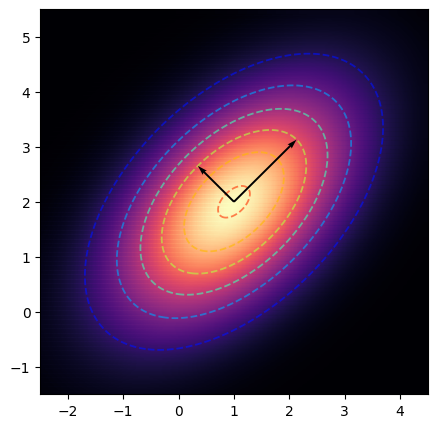

In [4]:
N = 300
k = 0.85
x_ = np.linspace(-2.5,4.5,N)
y_ = np.linspace(-1.5,5.5,N)
x,y = np.meshgrid(x_,y_)
pdf = mvn(mu,sigma).pdf(np.hstack((x.reshape(-1,1),y.reshape(-1,1))))
np.hstack((x.reshape(-1,1),y.reshape(-1,1)))
eigvals,eigvecs = np.linalg.eigh(sigma)
fig,ax = plt.subplots(figsize=(5,5))
ax.contour(x,y,pdf.reshape(N,N),cmap="jet",alpha=0.6,linewidths=1.3,linestyles="dashed")
for i in np.argsort(eigvals):
    ax.quiver(mu[0], mu[1], eigvecs[0,i]*(eigvals[i]*k)**0.5,eigvecs[1,i]*(eigvals[i]*k)**0.5,
              color='black', width=0.005,angles='xy', scale_units='xy', scale=1, zorder=2)
ax.scatter(x.reshape(-1),y.reshape(-1),c=pdf,cmap="magma",alpha=1,marker="s")
plt.show()

## Properties

### Mean and Variance
Such distribution has very interesting properties. Following the previous definitions, see that $\mathbb{E}[z_i] = 0$ and

$$\mathbb{E}[z_iz_j] = \int_{\mathbb{R}^n}z_iz_j \frac{1}{(2\pi)^{n/2}}e^{-z_i^2/2} dz = \int_\mathbb{R}z_i\frac{1}{\sqrt{2\pi}}e^{-z_i^2/2}dz_i \int_\mathbb{R}z_j\frac{1}{\sqrt{2\pi}}e^{-z_j^2/2}dz_j \prod_{\begin{matrix}k=1\\ k\neq i,j\end{matrix}}^n\int_{\mathbb{R}}\frac{1}{\sqrt{2\pi}}e^{-z_k^2/2} dz_k = 0,\ \text{   if } i\neq j$$

$$\mathbb{E}\left[z_i^2\right] = \int_{\mathbb{R}^n}z_i^2 \frac{1}{(2\pi)^{n/2}}e^{-z_i^2/2} dz = \int_\mathbb{R}z_i^2\frac{1}{\sqrt{2\pi}}e^{-z_i^2/2}dz_i \prod_{\begin{matrix}k=1\\ k\neq i\end{matrix}}^n\int_{\mathbb{R}}\frac{1}{\sqrt{2\pi}}e^{-z_k^2/2} dz_k = 1,\ \text{ if } i\neq j$$


Hence, $\mathbb{E}\left[zz'\right] = \left(\mathbb{E}[z_iz_j]\right)_{n\times n} = (\delta_{ij})_{n\times n} = I_n$ , so

$$\mathbb{E}[z] = \left(\mathbb{E}[z_1]\cdots\mathbb{E}[z_n]\right)'= 0_n$$
$$\mathbb{V}[z] = \mathbb{E}\left[z z'\right] - \mathbb{E}[z]\mathbb{E}[z]' = I_n - 0_n 0_n' = I_n$$

Therefore, 

$$\mathbb{E}[x] = \mathbb{E}\left[\Sigma^{1/2}z+\mu\right] = \Sigma^{1/2}\mathbb{E}[z] + \mu = \mu$$
$$\mathbb{V}[x] = \mathbb{V}\left[\Sigma^{1/2}z+\mu\right] = \Sigma^{1/2}\mathbb{V}[z](\Sigma^{1/2})' + \mathbb{Var}[\mu]= \Sigma^{1/2}I_n\Sigma^{1/2} + 0_{n,n} = \Sigma$$

### Mode
As the exponential is a monotone function, see that the terms inside of it are non-positive but reach a maximum value of $0$ if and only if $x=\mu$.
Thus, $\mu$ is the mode.

### Characteristic function
The characteristic function of a MVN is given by

$$C_x[t] = \mathbb{E}[e^{it'x}] = \int_{\mathbb{R}^n} \frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}\exp\left\{it'x -\frac{1}{2}(x-\mu)'\Sigma^{-1}(x-\mu)\right\} dx$$

Bu completing the square in the exponential, see that

$$it'x -\frac{1}{2}(x-\mu)'\Sigma^{-1}(x-\mu) = \frac{1}{2}\left(2ix't - x'\Sigma^{-1}x + 2x'\Sigma^{-1}\mu - \mu'\Sigma^{-1}\mu\right)$$
$$= \frac{1}{2}\left(- x'\Sigma^{-1}x + 2x'\Sigma^{-1}(\mu+i\Sigma t) - \mu'\Sigma^{-1}\mu\right) + \frac{1}{2}\left((\mu+i\Sigma t)'\Sigma^{-1}(\mu+i\Sigma t) - (\mu+i\Sigma t)'\Sigma^{-1}(\mu+i\Sigma t)\right)$$
$$= -\frac{1}{2}(x-(\mu+i\Sigma t))'\Sigma^{-1}(x-(\mu+i\Sigma t)) + i\mu't -\frac{1}{2}t'\Sigma t$$

Thus, the integral simplifies to

$$\exp\left\{ i\mu't -\frac{1}{2}t'\Sigma t \right\} \int_{\mathbb{R}^n} \frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}} \exp\left\{ -\frac{1}{2}(x-(\mu+i\Sigma t))'\Sigma^{-1}(x-(\mu+i\Sigma t))\right\} dx$$

So, 

$$C_x(t) = \exp\left\{ i\mu't -\frac{1}{2}t'\Sigma t \right\}\ \forall\ t\in\mathbb{R}^n$$

In [15]:
mean_scipy = mvn(mu,sigma).mean
cov_scipy = mvn(mu,sigma).cov

print(f"## Mean ##\nScipy-computed\n{mean_scipy}\nParameter\n{mu}\n\n## Cov. matrix ##\nScipy-computed\n{cov_scipy}\nParameter\n{sigma}")

## Mean ##
Scipy-computed
[1. 2.]
Parameter
[1 2]

## Cov. matrix ##
Scipy-computed
[[2. 1.]
 [1. 2.]]
Parameter
[[2 1]
 [1 2]]


## Estimation of parameters

Given a random sample $x_1,\dots,x_N$ of a MVN with true parameters $\mu,\Sigma$ we can estimate them using MLE analytically as follows.

$$\text{NLL}(\mu,\Sigma) = -\sum_{i=1}^N\log N(y_i| \mu,\Sigma) = \frac{Nn}{2}\log{2\pi} + \frac{N}{2}\log{|\Sigma|} +\frac{1}{2}\sum_{i=1}^N(x_i-\mu)'\Sigma^{-1}(x_i-\mu)$$

Before proceding, define

$$S(\mu) = \frac{1}{N}\sum_{i=1}^N(x_i-\mu)(x_i-\mu)'$$

and see that $\text{tr}\ S(\mu)\Sigma^{-1} = \frac{1}{N}\sum_{i=1}^N(x_i-\mu)'\Sigma^{-1}(x_i-\mu)$. Hence,

$$d[\text{NLL}](\mu,\Sigma) = d_\mu[\text{NLL}](\mu,\Sigma) + \text{vec}\ d_\Sigma[\text{NLL}](\mu,\Sigma)$$

$$ = \frac{1}{2}\sum_{i=1}^N\left((d\mu)'\Sigma^{-1}(x_i-\mu) + (x_i-\mu)'\Sigma^{-1}d\mu\right) + \text{vec}\left(\frac{N}{2}\text{tr}\ \Sigma^{-1}d\Sigma - \frac{N}{2}\text{tr}\ S(\mu)\Sigma^{-1}(d\Sigma)\Sigma^{-1}\right)$$

$$=\left(-\sum_{i=1}^N(x_i-\mu)'\Sigma^{-1}\right)d\mu + \frac{N}{2}\text{vec}\left(\Sigma^{-1}-\Sigma^{-1}S(\mu)\Sigma^{-1}\right)'d\text{vec}\Sigma$$

Thus, the Jacobian matrix is given by

$$D[\text{NLL}](\mu,\Sigma) = \begin{pmatrix}-\sum_{i=1}^N(x_i-\mu)'\Sigma^{-1} & \frac{N}{2}\text{vec}(\Sigma^{-1}-\Sigma^{-1}S(\mu)\Sigma^{-1})'\end{pmatrix}$$

After solving the equations for $D[\text{NLL}](\mu,\Sigma) = 0_{n+n^2}$ we determine that the MLE for $\mu$ and $\Sigma$ are given by

$$\hat\mu_{\tiny{\text{MLE}}} = \frac{1}{N}\sum_{i=1}^Nx_i$$
$$\hat\Sigma_{\tiny{\text{MLE}}} = \frac{1}{N}\sum_{i=1}^N(x_i-\hat\mu_{\tiny{\text{MLE}}})(x_i-\hat\mu_{\tiny{\text{MLE}}})'$$

In [11]:
mu_mle = X1.mean(axis=0)
sigma_mle = np.cov(X1.T)

print(f"## Mean ##\nTrue\n{mu}\nMLE\n{np.around(mu_mle,3)}\n\n## Cov. matrix ##\nTrue\n{sigma}\nMLE\n{np.around(sigma_mle,3)}")

## Mean ##
True
[1 2]
MLE
[1.02  2.018]

## Cov. matrix ##
True
[[2 1]
 [1 2]]
MLE
[[2.061 1.015]
 [1.015 1.969]]


# Marginal and Conditional Distributions of a MVN

To simplify the calculations, let $x_1,\mu_1\in\mathbb{R}^n,\ x_2,\mu_2\in\mathbb{R}^m,\ \Sigma_{11}\in\mathbb{R}^{n\times n},\ \Sigma_{12}\in\mathbb{R}^{n\times m},\ \Sigma_{21}\in\mathbb{R}^{m\times n},\ \Sigma_{22}\in\mathbb{R}^{m\times m}$ and define

$$x=\begin{pmatrix}x_1\\x_2\end{pmatrix}\in\mathbb{R}^{n+m}\ ,\ \mu=\begin{pmatrix}\mu_1\\\mu_2\end{pmatrix}\in\mathbb{R}^{n+m}\ ,\ \Sigma=\begin{pmatrix}\Sigma_{11} & \Sigma_{12}\\\Sigma_{21} & \Sigma_{22}\end{pmatrix}\in\mathbb{R}^{(n+m)\times(n+m)}$$

so that $x\sim N(\mu,\Sigma)$ is the joint distribution of $x_1,x_2$ namely $p(x_1,x_2)$. 

With this, we will compute the marginal $p(x_2)$ and the conditional $p(x_1|x_2)$ by factorizing the joint distribution as $p(x_1,x_2) = p(x_1|x_2) p(x_2)$.



First, we block diagonalize $\Sigma$ to get an eassier expression to invert. See that

$$\begin{pmatrix}I_n & -\Sigma_{12}\Sigma_{22}^{-1}\\ 0_{n,n} & I_m \end{pmatrix} \begin{pmatrix}\Sigma_{11} & \Sigma_{12}\\\Sigma_{21} & \Sigma_{22}\end{pmatrix} \begin{pmatrix}I_n & 0_{m,m}\\-\Sigma_{22}^{-1}\Sigma_{21} & I_m\end{pmatrix} = \begin{pmatrix}\Sigma_{11}-\Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21} & 0_{n,m}\\ 0_{m,n} & \Sigma_{22}\end{pmatrix}$$

Thus, the inversion is very simple

$$\begin{pmatrix}\Sigma_{11} & \Sigma_{12}\\\Sigma_{21} & \Sigma_{22}\end{pmatrix}^{-1} = \begin{pmatrix}I_m & 0_{m,m}\\-\Sigma_{22}^{-1}\Sigma_{21} & I_n\end{pmatrix} \begin{pmatrix}(\Sigma_{11}-\Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21})^{-1} & 0_{n,m}\\ 0_{m,n} & \Sigma_{22}^{-1}\end{pmatrix} \begin{pmatrix}I_n & -\Sigma_{12}\Sigma_{22}^{-1}\\0_{m,n} & I_m\end{pmatrix}$$

Therefore, it is easy to see that 

$$|\Sigma| = |\Sigma_{11}-\Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21}||\Sigma_{22}|$$

So, the joint pdf can be expressed as

$$\frac{1}{(2\pi)^{(n+m)/2}(|\Sigma_{11}-\Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21}||\Sigma_{22}|)^{1/2}} \exp\left\{-\frac{1}{2}\begin{pmatrix}x_1-\mu_1\\x_2-\mu_2\end{pmatrix}' \begin{pmatrix}I_m & 0_{m,m}\\-\Sigma_{22}^{-1}\Sigma_{21} & I_n\end{pmatrix} \begin{pmatrix}(\Sigma_{11}-\Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21})^{-1} & 0_{n,m}\\ 0_{m,n} & \Sigma_{22}^{-1}\end{pmatrix} \begin{pmatrix}I_n & -\Sigma_{12}\Sigma_{22}^{-1}\\0_{m,n} & I_m\end{pmatrix} \begin{pmatrix}x_1-\mu_1\\ x_2-\mu_2\end{pmatrix}\right\}$$

With some algebra, the terms in the exponential can be factorized as

$$ -\frac{1}{2}\left(x_1-\mu_1-\Sigma_{12}\Sigma_{22}^{-1}(x_2-\mu_2)\right)' \left(\Sigma_{11}-\Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21}\right)^{-1} \left(x_1-\mu_1-\Sigma_{12}\Sigma_{22}^{-1}(x_2-\mu_2)\right) -\frac{1}{2}(x_2-\mu_2)\Sigma_{22}^{-1}(x_2-\mu_2)$$

Thus, $p(x_1,x_2) = N(x_1| \mu_{1|2},\Sigma_{1|2}) N(x_2|\mu_2,\Sigma_{22})$ where
$$\mu_{1|2} = \mu_1+\Sigma_{12}\Sigma_{22}^{-1}(x_2-\mu_2)$$
$$\Sigma_{1|2} = \Sigma_{11}-\Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21}$$

Under an equivalent process,  the joint distribution can be factorized as $p(x_1,x_2) = N(x_2| \mu_{2|1},\Sigma_{2|1}) N(x_1;\mu_1,\Sigma_{11})$ where
$$\mu_{2|1} = \mu_2+\Sigma_{21}\Sigma_{11}^{-1}(x_1-\mu_1)$$
$$\Sigma_{2|1} = \Sigma_{22}-\Sigma_{21}\Sigma_{11}^{-1}\Sigma_{12}$$

Therefore, the marginal anc conditional distributions of a MVN are given by

$$p(x_i|x_j) = N(x_i| \mu_{i|j},\Sigma_{i|j})$$
$$p(x_i) = N(x_i| \mu_{i},\Sigma_{ii})$$

In [38]:
from scipy.stats import ortho_group 
from scipy.stats import uniform

To generate a random covariance matrix we must ensure positive definiteness. We can do this as follows.

Let $\lambda_1,\dots,\lambda_n>0$ and $\Lambda=\text{diag}(\lambda_1,\dots,\lambda_n)$. Recall that for any orthogonal matrix $U\in O(n)$, $U'U = UU' = I_n$ therefore $A = U\Lambda U'$ is positive definite.

In [620]:
def generate_cov_matrix(n):
    eigvals = uniform(1e-5,1).rvs(n)
    eigvecs = ortho_group(n).rvs(1)
    X = eigvecs @ np.diag(eigvals) @ eigvecs.T
    return X

In [621]:
n = 2
m = 3

mu = np.random.random(n+m)
sigma = generate_cov_matrix(n+m)

joint = mvn(mu,sigma)
marg_1 = mvn(mu[:n],sigma[:n,:n])
marg_2 =  mvn(mu[n:],sigma[n:,n:])
cond_12 = lambda x2: mvn(mu[:n]+(sigma[:n,n:]@np.linalg.inv(sigma[n:,n:])@(x2 -mu[n:]).reshape(-1,1)).reshape(-1),
                         sigma[:n,:n]-sigma[:n,n:]@np.linalg.inv(sigma[n:,n:])@sigma[n:,:n])
cond_21 = lambda x1: mvn(mu[n:]+(sigma[n:,:n]@np.linalg.inv(sigma[:n,:n])@(x1 -mu[:n]).reshape(-1,1)).reshape(-1),
                         sigma[n:,n:]-sigma[n:,:n]@np.linalg.inv(sigma[:n,:n])@sigma[:n,n:])

In [628]:
sample = joint.rvs(1000)

x1_mean_mle = sample[:,:n].mean(axis=0)
x1_cov_mle = np.cov(sample[:,:n].T)

x2_mean_mle = sample[:,n:].mean(axis=0)
x2_cov_mle = np.cov(sample[:,n:].T)

print("Marginal X_1\n")
print(f"Mean\nTrue: {np.around(marg_1.mean,3)}\nMLE: {np.around(x1_mean_mle,3)}\n")
print(f"Cov.Matrix\nTrue:\n{np.around(marg_1.cov,3)}\nMLE:\n{np.around(x1_cov_mle,3)}")

print("\nMarginal X_2\n")
print(f"Mean\nTrue: {np.around(marg_2.mean,3)}\nMLE: {np.around(x2_mean_mle,3)}\n")
print(f"Cov.Matrix\nTrue:\n{np.around(marg_2.cov,3)}\nMLE:\n{np.around(x2_cov_mle,3)}")

Marginal X_1

Mean
True: [0.021 0.749]
MLE: [0.046 0.776]

Cov.Matrix
True:
[[0.577 0.022]
 [0.022 0.661]]
MLE:
[[0.547 0.025]
 [0.025 0.619]]

Marginal X_2

Mean
True: [0.805 0.483 0.387]
MLE: [0.803 0.495 0.362]

Cov.Matrix
True:
[[ 0.15   0.025 -0.006]
 [ 0.025  0.163 -0.016]
 [-0.006 -0.016  0.223]]
MLE:
[[ 0.15   0.034  0.   ]
 [ 0.034  0.163 -0.018]
 [ 0.    -0.018  0.224]]


In [627]:
x1 = np.array([1,1])
x2 = np.array([2,2,2])

sample = cond_12(x2).rvs(1000)
x12_mean_mle = sample.mean(axis=0)
x12_cov_mle = np.cov(sample.T)

sample = cond_21(x1).rvs(1000)
x21_mean_mle = sample.mean(axis=0)
x21_cov_mle = np.cov(sample.T)

print("Conditional X_1|2\n")
print(f"Mean\nTrue: {np.around(cond_12(x2).mean,3)}\nMLE: {np.around(x12_mean_mle,3)}\n")
print(f"Cov.Matrix\nTrue:\n{np.around(cond_12(x2).cov,3)}\nMLE:\n{np.around(x12_cov_mle,3)}")

print("\nConditional X_2|1\n")
print(f"Mean\nTrue: {np.around(cond_21(x1).mean,3)}\nMLE: {np.around(x21_mean_mle,3)}\n")
print(f"Cov.Matrix\nTrue:\n{np.around(cond_21(x1).cov,3)}\nMLE:\n{np.around(x21_cov_mle,3)}")

Conditional X_1|2

Mean
True: [-1.311  1.263]
MLE: [-1.326  1.263]

Cov.Matrix
True:
[[ 0.377 -0.048]
 [-0.048  0.525]]
MLE:
[[ 0.374 -0.049]
 [-0.049  0.482]]

Conditional X_2|1

Mean
True: [0.883 0.528 0.013]
MLE: [ 0.885  0.531 -0.005]

Cov.Matrix
True:
[[0.146 0.023 0.011]
 [0.023 0.137 0.001]
 [0.011 0.001 0.14 ]]
MLE:
[[0.15  0.025 0.017]
 [0.025 0.126 0.001]
 [0.017 0.001 0.129]]


# Linear Gaussian systems

An aplication of the equations derived in last section is to solve the following probabilistic linear system.

Supose that two random normal variables $x\in\mathbb{R}^n$ and $z\in\mathbb{R}^m$ are related as follows

$$p(z) = \mathcal{N}(z|\mu_z,\Sigma_z)$$
$$p(x|z) = \mathcal{N}(x|Wz+b,\Sigma_x)$$

where $W\in\mathbb{R}^{n\times m}$ and $b\in\mathbb{R}^{n}$. Hence, the joint pdf $p(x,z)$ is given by a MVN with parameters

$$\mu = \begin{pmatrix}W\mu_z+b\\\mu_z\end{pmatrix}$$
$$\Sigma = \begin{pmatrix}\Sigma_x + W\Sigma_zW' & W\Sigma_z\\\Sigma_z W' & \Sigma_z\end{pmatrix}$$

Therefore, the marginal distribution for the variable $x$ is given by

$$p(x) = \mathcal{N}(x|W\mu_z+b,\Sigma_x+W\Sigma_zW')$$

Thus, the conditional distribution of $z$ given $x$ is $p(z|x) = \mathcal{N}(\mu_{z|x},\Sigma_{z|y})$ where
$$\Sigma_{z|x} = (\Sigma_x+W\Sigma_zW')^{-1}$$
$$\mu_{z|x} = \Sigma_{z|x}\left(\Sigma_z^{-1}\mu_z+W'\Sigma_x^{-1}(x-b)\right)$$